In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'gender_submission.csv', 'test.csv']


In [60]:
import seaborn as sns
import missingno as mino

데이터를 불러온다.

In [61]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

불러온 데이터를 확인해본다.

In [62]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [64]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### missing value가 있는지 확인해보자

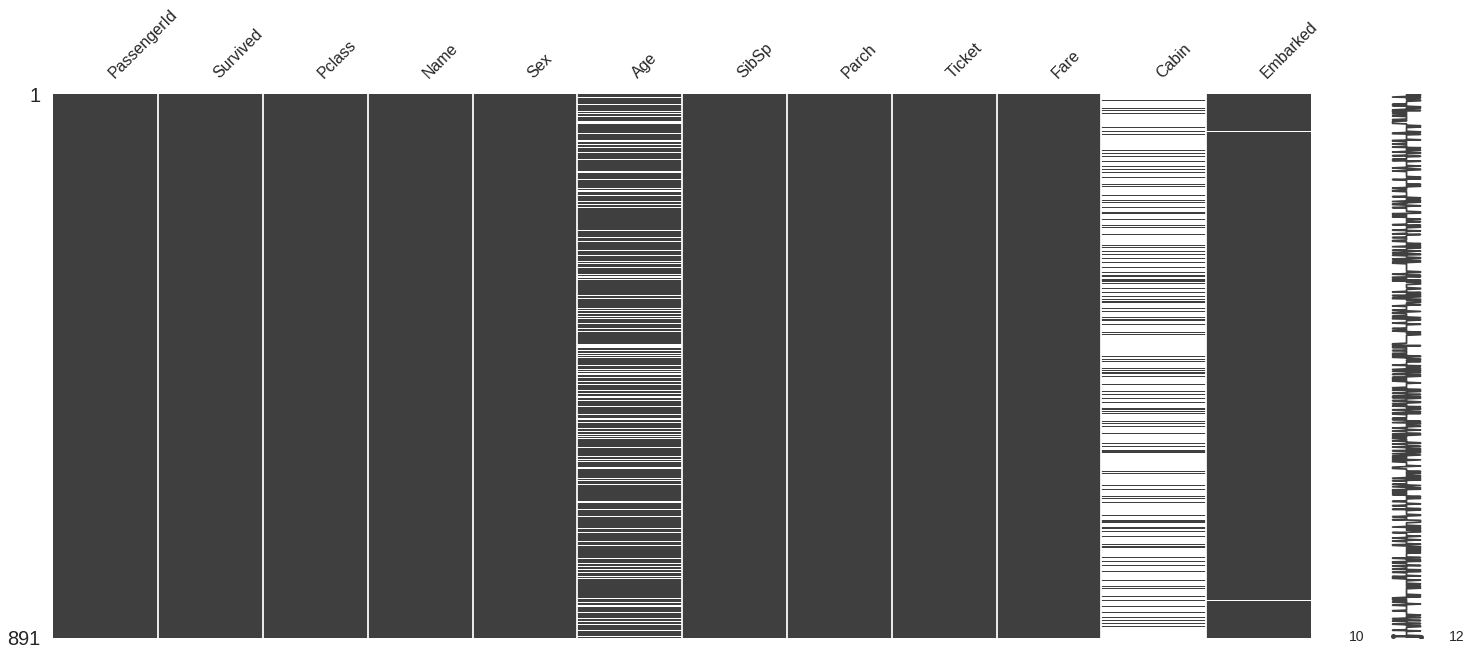

In [65]:
%matplotlib inline
mino.matrix(train)

'Age', 'Cabin', 'Embarked'에 missing value가 있는 것을 알 수 있다.

### 첫 번째로 'Pclass'에 따른 생존률을 확인해본다.

In [66]:
pd.crosstab(train['Pclass'], train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


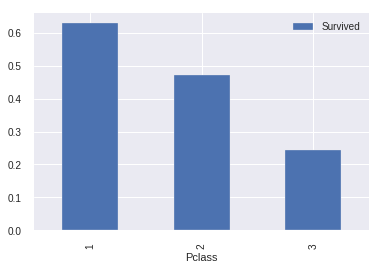

In [82]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

Pclass가 좋을수록 생존률이 높은 것을 알 수 있다.

### 두 번째로 'Sex'에 따른 생존률을 확인해본다.

In [69]:
pd.crosstab(train['Sex'], train['Survived'], margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


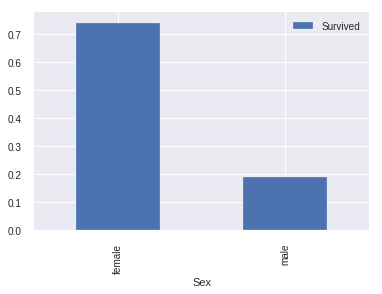

In [80]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar()

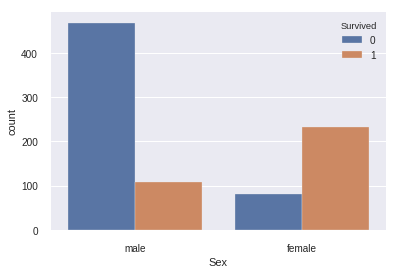

In [77]:
sns.countplot('Sex', hue='Survived', data=train)

여자가 생존률이 높은 것을 알 수 있다.

### 세 번째로 'Pclass'와 'Sex' 두 가지에 대하여 생존률이 어떻게 달라지는지 확인해본다.

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


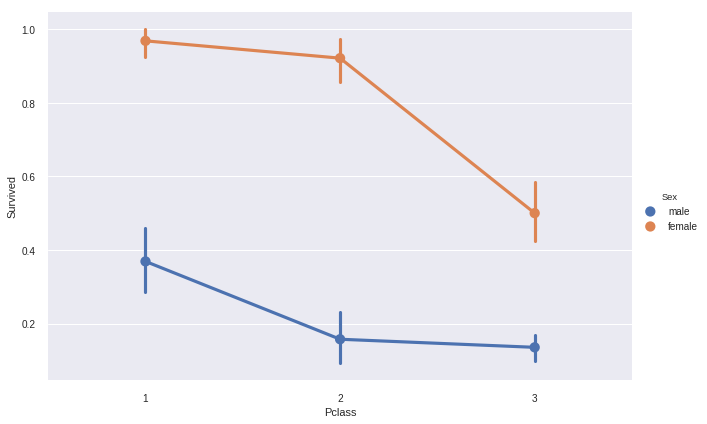

In [83]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=train, size=6, aspect=1.5)

1. 모든 'Pclass'에서 여성이 남성보다 생존률이 높은 것을 알 수 있다.
2. 'Sex'에 관계 없이 'Pclass'가 높으면 생존률이 높은 것을 알 수 있다.

### 네 번째로 'Age'에 따른 생존률을 확인해본다.

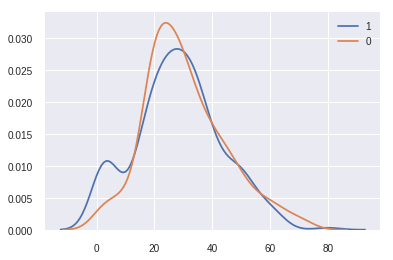

In [91]:
sns.kdeplot(train[train['Survived'] == 1]['Age'])
sns.kdeplot(train[train['Survived'] == 0]['Age'])
plt.legend(['1', '0'])
plt.show()

대체적으로 어린이 혹은 청년층이 생존자가 많은 것을 알 수 있다.

### 다섯 번째로 'Pclass'와 'Age' 두 가지에 대하여 생존률이 어떻게 달라지는지 확인해본다.

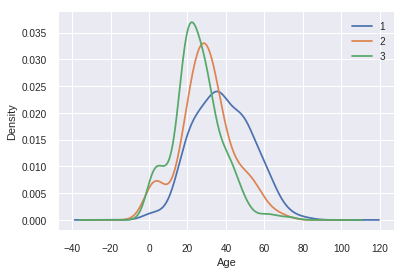

In [92]:
train['Age'][train['Pclass'] == 1].plot(kind='kde')
train['Age'][train['Pclass'] == 2].plot(kind='kde')
train['Age'][train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.legend(['1', '2', '3'])

나이가 많을수록 'Pclass'가 좋은 것을 알 수 있다.

### 여섯 번째로 'Age'의 범위를 좁혀가면서 생존률이 어떻게 달라지는지 확인해본다.

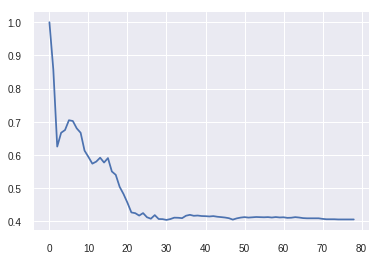

In [93]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(train[train['Age'] < i]['Survived'].sum() / len(train[train['Age'] < i]['Survived']))
    
plt.plot(cummulate_survival_ratio)
plt.show()

'Age'가 적을수록 생존률이 높은 것을 알 수 있다.  
**즉, 'Age'는 중요한 feature로 쓰일 수 있다.**

### 일곱 번째로 'Embarked'에 따른 생존률을 확인해본다.

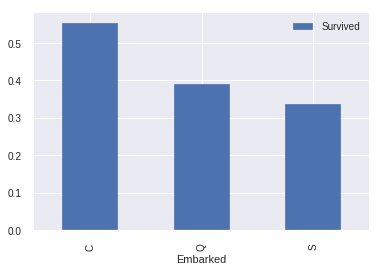

In [94]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().plot.bar()

각 'Embarked'별로 생존률에 차이가 있는 것을 확인할 수 있다.

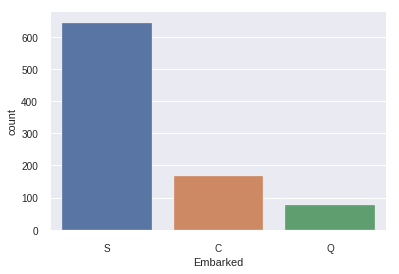

In [101]:
sns.countplot('Embarked', data=train)

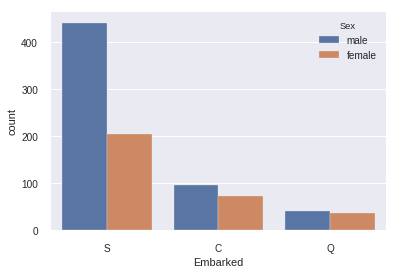

In [102]:
sns.countplot('Embarked', hue='Sex', data=train)

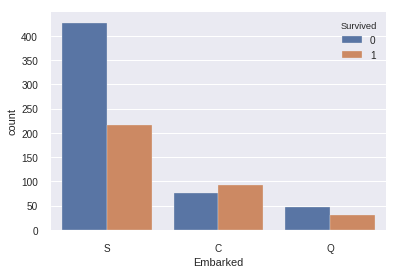

In [103]:
sns.countplot('Embarked', hue='Survived', data=train)

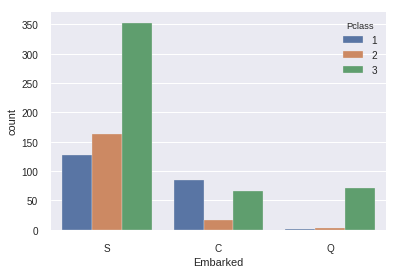

In [104]:
sns.countplot('Embarked', hue='Pclass', data=train)

1. 'Southampton'에서 사람이 가장 많이 탑승한 것을 알 수 있다.
2. 'Cherbourg'와 'Queenstown'는 'Sex'의 비율이 비슷하고, 'Southampton'는 남성이 많다는 것을 알 수 있다.
3. 생존률은 'Southampton'가 낮은 것을 알 수 있다.
4. 'Cherbourg'의 생존률이 높은 것은 'Pclass'가 높은 사람의 비율이 높기 때문인 것을 알 수 있다.  
'Southampton'는 'Pclass'가 낮은 사람의 비율이 높기 때문에 생존률이 낮다.

### 여덟 번째로 'SibSp'와 'Parch'에 따른 생존률을 확인해본다.

여기서는 'SibSp'와 'Parch'를 합쳐 'Family'를 만들어서 확인해보도록 한다.

In [105]:
train['Family'] = train['SibSp'] + train['Parch']
test['Family'] = test['SibSp'] + test['Parch']

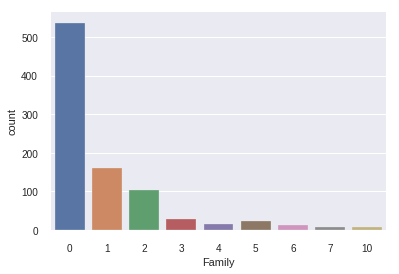

In [106]:
sns.countplot('Family', data=train)

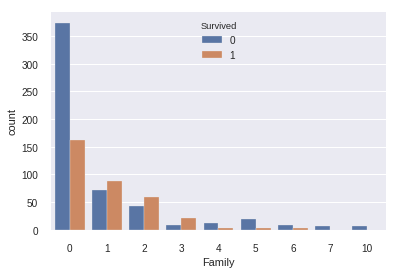

In [107]:
sns.countplot('Family', hue='Survived', data=train)

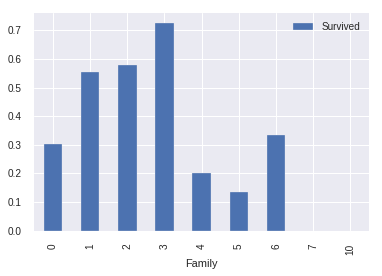

In [108]:
train[['Family', 'Survived']].groupby(['Family'], as_index=True).mean().plot.bar()

1. 가족이 없는 사람이 가장 많은 것을 알 수 있다.
2. 가족 수에 따른 생존률은 큰 의미가 없어보이는 것을 알 수 있다.  
가족이 없다고 생존률이 높거나, 많다고 생존률이 높지 않고 1, 2, 3명일 때 높다.

### 아홉 번째로 'Fare'에 따른 생존률을 확인해본다.

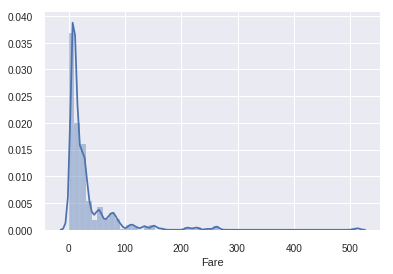

In [109]:
sns.distplot(train['Fare'])

1. 분포가 비정상적인 것을 알 수 있다.  
즉, 이 데이터를 학습하게되면 몇개 없는 outlier에 대해 민감하게 반응할 수 있다.  
--> outlier의 영향을 줄이기 위해 'Fare'에 log를 취해본다.

In [110]:
test.loc[test.Fare.isnull(), 'Fare'] = test['Fare'].mean()

In [111]:
train['Fare'] = train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
test['Fare'] = test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

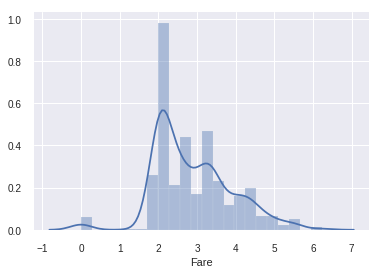

In [112]:
sns.distplot(train['Fare'])

log를 취하니 비대칭성이 많이 사라진 것을 볼 수 있다.

### 열 번째로 'Cabin'은 Nan이 대략 80%로 중요한 정보라고 볼 수 없으므로 모델에 포함시키지 않는다.

### 열 한번째로 'Ticket'에 따른 사망률을 확인해본다.

In [113]:
train['Ticket'].value_counts()

CA. 2343            7
1601                7
347082              7
347088              6
CA 2144             6
3101295             6
S.O.C. 14879        5
382652              5
113781              4
W./C. 6608          4
19950               4
17421               4
347077              4
349909              4
4133                4
PC 17757            4
LINE                4
113760              4
2666                4
SC/Paris 2123       3
371110              3
F.C.C. 13529        3
C.A. 31921          3
29106               3
PC 17582            3
248727              3
345773              3
C.A. 34651          3
110413              3
PC 17572            3
                   ..
SOTON/O2 3101287    1
2674                1
367232              1
349212              1
349217              1
14313               1
A/5 2817            1
W.E.P. 5734         1
111369              1
2641                1
35852               1
4136                1
SC/PARIS 2131       1
330909              1
226593    

'Ticekt'의 값이 매우 다양한 것을 알 수 있다.